In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/realestate/Real Estate Data V21.csv")
df.head()

Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, Triplicane,Chennai        4250          7840.0   
4                            Avadi, Chennai         960          5000.0   

                                         Description  Baths Balcony  
0  Best 4 BHK Apartment for modern-day lifestyle ...      4     Yes  
1  Looking for a 10 BHK Independent House for sal...      6     Yes  
2  Property for sale in Tambaram, Chennai. This 3...      3      No  
3  Entire Building for sale with 7 units of singl...      5     Yes  
4  Property for sale in Avadi, Chennai. This 2 BH...      3     Yes

In [3]:
df2=df

In [4]:
#Data cleaning

In [5]:
df2.shape

(14528, 9)

In [6]:
BHK = []
for i in range(0,14528):
    BHK.append(df2['Property Title'][i][:2])

df2['Bedrooms'] = BHK

df2["Bedrooms"] = df2["Bedrooms"].str.replace(".","")
df2["Bedrooms"] = df2["Bedrooms"].str.replace("+","")
df2["Bedrooms"] = df2["Bedrooms"].str.replace("St","")
df2["Bedrooms"] = df2["Bedrooms"].str.replace("","")

df3 = df2

df3["Bedrooms"].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_21492\483308283.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Bedrooms"] = df2["Bedrooms"].str.replace(".","")
C:\Users\HP\AppData\Local\Temp\ipykernel_21492\483308283.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Bedrooms"] = df2["Bedrooms"].str.replace("+","")


2     5691
1     3270
3     3132
4      990
5      438
6      296
10     200
7      143
8      132
9       78
3       44
2       30
1       30
5       24
        11
4       10
9        4
8        2
7        2
Sh       1
Name: Bedrooms, dtype: int64

In [7]:
bad_df = df3.index.isin([1186, 3497, 4003, 4005, 5889, 7527, 7594, 7993, 9148, 12355,14487])
df3 = df3[~bad_df]

df3['Bedrooms'].value_counts()

df3["Bedrooms"] = df3["Bedrooms"].str.replace("Sh","1")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("1 ","1")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("2 ","2")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("3 ","3")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("4 ","4")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("5 ","5")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("6 ","6")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("7 ","7")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("8 ","8")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("9 ","9")
df3["Bedrooms"] = df3["Bedrooms"].str.replace("Sh","3")

df3['Bedrooms'].value_counts()

df3['Bedrooms'] = df3['Bedrooms'].astype(int)

df3['Bedrooms'] > 1

df3['Bedrooms1'] = np.where(df3['Bedrooms'] > 1, df3['Bedrooms'].astype(str) + ' BHK',df3['Bedrooms'].astype(str) + ' RK')

In [8]:
df3.head()

Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, Triplicane,Chennai        4250          7840.0   
4                            Avadi, Chennai         960          5000.0   

                                         Description  Baths Balcony  Bedrooms  \
0  Best 4 BHK Apartment for modern-day lifestyle ...      4     Yes         4   
1  Looking for a 10 BHK Independent House for sal...      6     Yes        10   
2  Property for sale in Tambaram, Chennai. This 3...      3      No         3   
3  Entire Building for sale with 7 units of singl...      5     Yes         7   
4  Property for sale in Avadi, Chennai. This 2 BH...      3     Yes         2   

  Bedrooms1  
0     4 BHK  
1    10 BHK  
2     3 BHK  
3     7 BHK  
4     2 BHK

In [9]:
df3["Name"].isin(df3["Location"]).value_counts()

True     8883
False    5634
Name: Name, dtype: int64

In [10]:
df_split1 = df3[~df3["Name"].isin(df3["Location"])]

df_split2 = df3[df3["Name"].isin(df3["Location"])]

In [11]:
df_split2['Name'][1].split(',')[-2]

df_split2 = df_split2.reset_index()

len(df_split2)

property_loc = []
for i in range(0,8883):
    property_loc.append(df_split2['Name'][i].split(',')[-2])

df_split2['Name1'] = property_loc

df_split2['Name1'] = 'Property in ' + df_split2['Name1'].astype(str) 

df_split2.head()

index                                            Name  \
0      1           Ramanathan Nagar, Pozhichalur,Chennai   
1      3         Naveenilaya,Chepauk, Triplicane,Chennai   
2      6    THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai   
3     12        Ramakrishna Puram, West Mambalam,Chennai   
4     13  Deepak home,Mettuppalayam, Ashok Nagar,Chennai   

                                      Property Title     Price  \
0  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
1  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
2          2 BHK Flat for sale in Sembakkam, Chennai   ₹60.0 L   
3     6 BHK Villa for sale in West Mambalam, Chennai   ₹8.5 Cr   
4        2 BHK Flat for sale in Ashok Nagar, Chennai  ₹1.15 Cr   

                                         Location  Total_Area  Price_per_SQFT  \
0           Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
1         Naveenilaya,Chepauk, Triplicane,Chennai        4250          7840.0   
2    THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai         880          6820.0   
3        Ramakrishna Puram, West Mambalam,Chennai        6000         14170.0   
4  Deepak home,Mettuppalayam, Ashok Nagar,Chennai         878         13100.0   

                                         Description  Baths Balcony  Bedrooms  \
0  Looking for a 10 BHK Independent House for sal...      6     Yes        10   
1  Entire Building for sale with 7 units of singl...      5     Yes         7   
2  2 BHK Apartment for sale in Chennai. This prop...      3     Yes         2   
3  Looking for a 6 BHK Villa for sale in Chennai?...      1     Yes         6   
4  13a,4th Street, Ragavan colony, Ashok Nagar, C...      3     Yes         2   

  Bedrooms1                       Name1  
0    10 BHK    Property in  Pozhichalur  
1     7 BHK     Property in  Triplicane  
2     2 BHK      Property in  Sembakkam  
3     6 BHK  Property in  West Mambalam  
4     2 BHK    Property in  Ashok Nagar

In [12]:
df_split2.columns

df_split_Edit = df_split2[['Name1', 'Bedrooms1','Baths', 'Balcony','Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Property Title', 'Description']]

df_split_Edit = df_split_Edit.rename(columns={'Name1': 'Name'})

df_split1_edit = df_split1[['Name', 'Bedrooms1','Baths', 'Balcony','Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Property Title', 'Description']]
df_split1_edit.head()

Name Bedrooms1  Baths Balcony     Price  \
0          Casagrand ECR 14     4 BHK      4     Yes  ₹1.99 Cr   
2               DAC Prapthi     3 BHK      3      No   ₹1.0 Cr   
4  VGN Spring Field Phase 1     2 BHK      3     Yes   ₹48.0 L   
5            KG Earth Homes     2 BHK      3      No   ₹40.0 L   
7          TK Jasmine Grove     3 BHK      3     Yes  ₹72.35 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
4                            Avadi, Chennai         960          5000.0   
5                         Siruseri, Chennai         940          4250.0   
7              Mahindra World City, Chennai        1700          4250.0   

                                      Property Title  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
2      3 BHK Flat for sale in West Tambaram, Chennai   
4              2 BHK Flat for sale in Avadi, Chennai   
5           2 BHK Flat for sale in Siruseri, Chennai   
7  3 BHK Independent House for sale in Mahindra W...   

                                         Description  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
2  Property for sale in Tambaram, Chennai. This 3...  
4  Property for sale in Avadi, Chennai. This 2 BH...  
5  Price negotiable. Big hall, big balcony, gated...  
7  A 3 BHK Independent House for sale in Mahindra...

In [13]:
again_new_data = pd.concat([df_split1_edit,df_split_Edit], ignore_index=True)

again_new_data.shape
again_new_data.head()

Name Bedrooms1  Baths Balcony     Price  \
0          Casagrand ECR 14     4 BHK      4     Yes  ₹1.99 Cr   
1               DAC Prapthi     3 BHK      3      No   ₹1.0 Cr   
2  VGN Spring Field Phase 1     2 BHK      3     Yes   ₹48.0 L   
3            KG Earth Homes     2 BHK      3      No   ₹40.0 L   
4          TK Jasmine Grove     3 BHK      3     Yes  ₹72.35 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2                            Avadi, Chennai         960          5000.0   
3                         Siruseri, Chennai         940          4250.0   
4              Mahindra World City, Chennai        1700          4250.0   

                                      Property Title  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1      3 BHK Flat for sale in West Tambaram, Chennai   
2              2 BHK Flat for sale in Avadi, Chennai   
3           2 BHK Flat for sale in Siruseri, Chennai   
4  3 BHK Independent House for sale in Mahindra W...   

                                         Description  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
1  Property for sale in Tambaram, Chennai. This 3...  
2  Property for sale in Avadi, Chennai. This 2 BH...  
3  Price negotiable. Big hall, big balcony, gated...  
4  A 3 BHK Independent House for sale in Mahindra...

In [14]:
print("No of Villa Properties are: {}".format(len(again_new_data[again_new_data['Property Title'].str.contains('Villa')])))
again_new_data[again_new_data['Property Title'].str.contains('Villa')][:4]

No of Villa Properties are: 737


Name Bedrooms1  Baths Balcony     Price  \
12                       CasaGrand Vistaaz     3 BHK      3      No  ₹1.08 Cr   
20  Jones Dawn Villas by Jones Foundations     3 BHK      3     Yes   ₹87.0 L   
61                 Adityaram Nagar Phase 5     4 BHK      5     Yes   ₹2.6 Cr   
64                   Pacifica Aurum Villas     4 BHK      4     Yes   ₹1.4 Cr   

                             Location  Total_Area  Price_per_SQFT  \
12     Kolapakkam - Vandalur, Chennai        1566          6900.0   
20                    Ponmar, Chennai        1782          4880.0   
61  Adityaram Nagar, Panaiyur,Chennai        3500          7430.0   
64                     Padur, Chennai        2117          6610.0   

                                       Property Title  \
12  3 BHK Villa for sale in Kolapakkam - Vandalur,...   
20            3 BHK Villa for sale in Ponmar, Chennai   
61          4 BHK Villa for sale in Panaiyur, Chennai   
64             4 BHK Villa for sale in Padur, Chennai   

                                          Description  
12  Close to Shriram IT Gateway and New Kilambakka...  
20  One of the finest property in Moolacheri is no...  
61  Looking for a good 4 BHK Villa in Panayur, Che...  
64  Looking for a good 4 BHK Villa in Padur, Chenn...

In [15]:
again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Villa') == True,
                                           'Villa', 'To Add')

again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Independent House') == True ,
                                           'Independent House', again_new_data['Property_Type'])

again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Flat') == True ,
                                           'Flat', again_new_data['Property_Type'])

In [16]:
again_new_data['Price'][1].replace('₹','').replace(' Cr','')

'1.0'

In [17]:
new_data_split = again_new_data

new_data_split['Price'] = new_data_split['Price'].map(lambda x: x.lstrip('₹').rstrip(' Cr'))

croress = new_data_split[~new_data_split['Price'].str.contains(' L')]

lakhs = new_data_split[new_data_split['Price'].str.contains(' L')]

In [18]:
croress['Price'] = croress['Price'].map(lambda x: x.rstrip('k'))

croress['Price'] = croress['Price'].astype(float)

croress['Price'] = croress['Price']*10000000

croress.head()

Name Bedrooms1  Baths Balcony       Price  \
0   Casagrand ECR 14     4 BHK      4     Yes  19900000.0   
1        DAC Prapthi     3 BHK      3      No  10000000.0   
8     DRA 90 Degrees     3 BHK      3      No  13000000.0   
10  Ramcons Dominion     3 BHK      3     Yes  26000000.0   
11        VGN Coasta     4 BHK      5     Yes  29700000.0   

                                    Location  Total_Area  Price_per_SQFT  \
0              Kanathur Reddikuppam, Chennai        2583          7700.0   
1   Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
8          Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
10    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
11                        Muttukadu, Chennai        4200          7070.0   

                                       Property Title  \
0   4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1       3 BHK Flat for sale in West Tambaram, Chennai   
8        3 BHK Flat for sale in Pallikaranai, Chennai   
10       3 BHK Flat for sale in Nungambakkam, Chennai   
11          4 BHK Flat for sale in Muttukadu, Chennai   

                                          Description Property_Type  
0   Best 4 BHK Apartment for modern-day lifestyle ...          Flat  
1   Property for sale in Tambaram, Chennai. This 3...          Flat  
8   Looking for a 3 BHK Apartment for sale in Chen...          Flat  
10  Best 3 BHK Apartment for modern-day lifestyle ...          Flat  
11  Best 4 BHK Apartment for modern-day lifestyle ...          Flat

In [19]:
lakhs['Price'] = lakhs['Price'].map(lambda x: x.rstrip(' L'))

lakhs['Price'] = lakhs['Price'].map(lambda x: x.rstrip(' Lacs'))

lakhs['Price'] = lakhs['Price'].astype(float)

lakhs['Price'] = lakhs['Price']*100000

lakhs.head()

Name Bedrooms1  Baths Balcony      Price  \
2  VGN Spring Field Phase 1     2 BHK      3     Yes  4800000.0   
3            KG Earth Homes     2 BHK      3      No  4000000.0   
4          TK Jasmine Grove     3 BHK      3     Yes  7235000.0   
5                    Avenue     2 BHK      3      No  4200000.0   
6        Guru Kothai Aparts      1 RK      2      No  3000000.0   

                                  Location  Total_Area  Price_per_SQFT  \
2                           Avadi, Chennai         960          5000.0   
3                        Siruseri, Chennai         940          4250.0   
4             Mahindra World City, Chennai        1700          4250.0   
5  Brindavan Colony, West Tambaram,Chennai         840          5000.0   
6            New Colony, Chromepet,Chennai         535          5610.0   

                                      Property Title  \
2              2 BHK Flat for sale in Avadi, Chennai   
3           2 BHK Flat for sale in Siruseri, Chennai   
4  3 BHK Independent House for sale in Mahindra W...   
5      2 BHK Flat for sale in West Tambaram, Chennai   
6          1 BHK Flat for sale in Chromepet, Chennai   

                                         Description      Property_Type  
2  Property for sale in Avadi, Chennai. This 2 BH...               Flat  
3  Price negotiable. Big hall, big balcony, gated...               Flat  
4  A 3 BHK Independent House for sale in Mahindra...  Independent House  
5  Check out this 2 BHK Apartment for sale in Tam...               Flat  
6  We are the proud owners of this 1 bhk apartmen...               Flat

In [20]:
again_new_data_mega = pd.concat([croress, lakhs], ignore_index=True)
again_new_data_mega.head()

Name Bedrooms1  Baths Balcony       Price  \
0  Casagrand ECR 14     4 BHK      4     Yes  19900000.0   
1       DAC Prapthi     3 BHK      3      No  10000000.0   
2    DRA 90 Degrees     3 BHK      3      No  13000000.0   
3  Ramcons Dominion     3 BHK      3     Yes  26000000.0   
4        VGN Coasta     4 BHK      5     Yes  29700000.0   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

                                      Property Title  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1      3 BHK Flat for sale in West Tambaram, Chennai   
2       3 BHK Flat for sale in Pallikaranai, Chennai   
3       3 BHK Flat for sale in Nungambakkam, Chennai   
4          4 BHK Flat for sale in Muttukadu, Chennai   

                                         Description Property_Type  
0  Best 4 BHK Apartment for modern-day lifestyle ...          Flat  
1  Property for sale in Tambaram, Chennai. This 3...          Flat  
2  Looking for a 3 BHK Apartment for sale in Chen...          Flat  
3  Best 3 BHK Apartment for modern-day lifestyle ...          Flat  
4  Best 4 BHK Apartment for modern-day lifestyle ...          Flat

In [21]:
again_new_data_mega['Location'][i].split(',')[-1]

' Chennai'

In [22]:
lococity = []
for i in range(0,14517):
    lococity.append(again_new_data_mega['Location'][i].split(',')[-1].replace(' Bangalore','Bangalore').replace(' Pune','Pune').replace(' Chennai','Chennai').replace(' New Delhi','New Delhi').replace(' Hyderabad','Hyderabad').replace(' Mumbai','Mumbai').replace(' Kolkata','Kolkata'))

again_new_data_mega['City'] = lococity

again_new_data_mega['City'].value_counts()

Bangalore    4509
Pune         2963
New Delhi    2164
Chennai      1594
Kolkata      1391
Mumbai       1350
Hyderabad     540
Thane           6
Name: City, dtype: int64

In [23]:
again_new_data_mega.columns

again_new_data_mega1 = again_new_data_mega[['Name','Property_Type', 'Bedrooms1', 'Baths', 'Balcony',  'City' ,
                                            'Location', 'Total_Area', 'Price_per_SQFT', 'Price', 'Property Title', 'Description']]

again_new_data_mega1.head()

Name Property_Type Bedrooms1  Baths Balcony     City  \
0  Casagrand ECR 14          Flat     4 BHK      4     Yes  Chennai   
1       DAC Prapthi          Flat     3 BHK      3      No  Chennai   
2    DRA 90 Degrees          Flat     3 BHK      3      No  Chennai   
3  Ramcons Dominion          Flat     3 BHK      3     Yes  Chennai   
4        VGN Coasta          Flat     4 BHK      5     Yes  Chennai   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

        Price                                     Property Title  \
0  19900000.0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10000000.0      3 BHK Flat for sale in West Tambaram, Chennai   
2  13000000.0       3 BHK Flat for sale in Pallikaranai, Chennai   
3  26000000.0       3 BHK Flat for sale in Nungambakkam, Chennai   
4  29700000.0          4 BHK Flat for sale in Muttukadu, Chennai   

                                         Description  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
1  Property for sale in Tambaram, Chennai. This 3...  
2  Looking for a 3 BHK Apartment for sale in Chen...  
3  Best 3 BHK Apartment for modern-day lifestyle ...  
4  Best 4 BHK Apartment for modern-day lifestyle ...

In [24]:
print("No of rows to iterate:{}".format(len(again_new_data_mega1)))

descrip = []
for i in range(0,14517):
    descrip.append(again_new_data_mega1['Description'][i].split('.')[:-4])

No of rows to iterate:14517


In [25]:
descriptiv = []
for i in range(0,14517):
    descriptiv.append('.'.join(descrip[i]))
    
print("Difference can be seen below")
print("Before")
display(descrip[0])
print('-'*50)
print(' '*50)
print('-'*50)
print("After")
display(descriptiv[0])

Difference can be seen below
Before


['Best 4 BHK Apartment for modern-day lifestyle is now available for sale',
 ' No brokerage involved, Posted by Owner',
 " Grab this 4 BHK property for sale in one of Chennai's top location, Kanathur Reddikuppam",
 ' It is situated on floor 13',
 ' The total number of floors in this Apartment is 14',
 ' The property price of this unit is Rs 1',
 '99 Cr',
 ' The built-up area is 2583 Square feet',
 ' There are 4 bedrooms and 4 bathroom',
 ' It is an ideal location for young families with kids, as this property is close to Mount Litera Zee School, OMR, Chennai, Amelio Early Education - Siruseri, and Chennai Mathematical Institute']

--------------------------------------------------
                                                  
--------------------------------------------------
After


"Best 4 BHK Apartment for modern-day lifestyle is now available for sale. No brokerage involved, Posted by Owner. Grab this 4 BHK property for sale in one of Chennai's top location, Kanathur Reddikuppam. It is situated on floor 13. The total number of floors in this Apartment is 14. The property price of this unit is Rs 1.99 Cr. The built-up area is 2583 Square feet. There are 4 bedrooms and 4 bathroom. It is an ideal location for young families with kids, as this property is close to Mount Litera Zee School, OMR, Chennai, Amelio Early Education - Siruseri, and Chennai Mathematical Institute"

In [26]:
again_new_data_mega1['Description1'] = descriptiv

again_new_data_mega2 = again_new_data_mega1.drop('Description', axis=1)

again_new_data_mega2.head()

Name Property_Type Bedrooms1  Baths Balcony     City  \
0  Casagrand ECR 14          Flat     4 BHK      4     Yes  Chennai   
1       DAC Prapthi          Flat     3 BHK      3      No  Chennai   
2    DRA 90 Degrees          Flat     3 BHK      3      No  Chennai   
3  Ramcons Dominion          Flat     3 BHK      3     Yes  Chennai   
4        VGN Coasta          Flat     4 BHK      5     Yes  Chennai   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

        Price                                     Property Title  \
0  19900000.0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10000000.0      3 BHK Flat for sale in West Tambaram, Chennai   
2  13000000.0       3 BHK Flat for sale in Pallikaranai, Chennai   
3  26000000.0       3 BHK Flat for sale in Nungambakkam, Chennai   
4  29700000.0          4 BHK Flat for sale in Muttukadu, Chennai   

                                        Description1  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
1  Property for sale in Tambaram, Chennai. This 3...  
2  Looking for a 3 BHK Apartment for sale in Chen...  
3  Best 3 BHK Apartment for modern-day lifestyle ...  
4  Best 4 BHK Apartment for modern-day lifestyle ...

In [27]:
again_new_data_mega2.to_csv('Cleaned Real Estate Data V21.csv', index=False)
again_new_data_mega2.head()

Name Property_Type Bedrooms1  Baths Balcony     City  \
0  Casagrand ECR 14          Flat     4 BHK      4     Yes  Chennai   
1       DAC Prapthi          Flat     3 BHK      3      No  Chennai   
2    DRA 90 Degrees          Flat     3 BHK      3      No  Chennai   
3  Ramcons Dominion          Flat     3 BHK      3     Yes  Chennai   
4        VGN Coasta          Flat     4 BHK      5     Yes  Chennai   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

        Price                                     Property Title  \
0  19900000.0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10000000.0      3 BHK Flat for sale in West Tambaram, Chennai   
2  13000000.0       3 BHK Flat for sale in Pallikaranai, Chennai   
3  26000000.0       3 BHK Flat for sale in Nungambakkam, Chennai   
4  29700000.0          4 BHK Flat for sale in Muttukadu, Chennai   

                                        Description1  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
1  Property for sale in Tambaram, Chennai. This 3...  
2  Looking for a 3 BHK Apartment for sale in Chen...  
3  Best 3 BHK Apartment for modern-day lifestyle ...  
4  Best 4 BHK Apartment for modern-day lifestyle ...

In [28]:
df = pd.read_csv("Cleaned Real Estate Data V21.csv")
df.head()

Name Property_Type Bedrooms1  Baths Balcony     City  \
0  Casagrand ECR 14          Flat     4 BHK      4     Yes  Chennai   
1       DAC Prapthi          Flat     3 BHK      3      No  Chennai   
2    DRA 90 Degrees          Flat     3 BHK      3      No  Chennai   
3  Ramcons Dominion          Flat     3 BHK      3     Yes  Chennai   
4        VGN Coasta          Flat     4 BHK      5     Yes  Chennai   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

        Price                                     Property Title  \
0  19900000.0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10000000.0      3 BHK Flat for sale in West Tambaram, Chennai   
2  13000000.0       3 BHK Flat for sale in Pallikaranai, Chennai   
3  26000000.0       3 BHK Flat for sale in Nungambakkam, Chennai   
4  29700000.0          4 BHK Flat for sale in Muttukadu, Chennai   

                                        Description1  
0  Best 4 BHK Apartment for modern-day lifestyle ...  
1  Property for sale in Tambaram, Chennai. This 3...  
2  Looking for a 3 BHK Apartment for sale in Chen...  
3  Best 3 BHK Apartment for modern-day lifestyle ...  
4  Best 4 BHK Apartment for modern-day lifestyle ...

In [29]:
#EDA

In [30]:
df.nunique()

Name               6229
Property_Type         3
Bedrooms1            10
Baths                 6
Balcony               2
City                  8
Location           7045
Total_Area         1773
Price_per_SQFT     2092
Price               886
Property Title     6497
Description1      14459
dtype: int64

In [31]:
df.isna().sum()/len(df)*100

Name              0.000000
Property_Type     0.000000
Bedrooms1         0.000000
Baths             0.000000
Balcony           0.000000
City              0.000000
Location          0.000000
Total_Area        0.000000
Price_per_SQFT    0.000000
Price             0.000000
Property Title    0.000000
Description1      0.117104
dtype: float64

In [32]:
df.describe(include = 'all')

Name Property_Type Bedrooms1        Baths  \
count                          14517         14517     14517  14517.00000   
unique                          6229             3        10          NaN   
top     Property in  Electronic City          Flat     2 BHK          NaN   
freq                              57          9697      5721          NaN   
mean                             NaN           NaN       NaN      2.75167   
std                              NaN           NaN       NaN      0.89800   
min                              NaN           NaN       NaN      1.00000   
25%                              NaN           NaN       NaN      2.00000   
50%                              NaN           NaN       NaN      3.00000   
75%                              NaN           NaN       NaN      3.00000   
max                              NaN           NaN       NaN      6.00000   

       Balcony       City                     Location    Total_Area  \
count    14517      14517                        14517  14517.000000   
unique       2          8                         7045           NaN   
top        Yes  Bangalore  Sector 12 Dwarka, New Delhi           NaN   
freq      8574       4509                           44           NaN   
mean       NaN        NaN                          NaN   1297.690019   
std        NaN        NaN                          NaN   1243.919931   
min        NaN        NaN                          NaN     70.000000   
25%        NaN        NaN                          NaN    650.000000   
50%        NaN        NaN                          NaN   1000.000000   
75%        NaN        NaN                          NaN   1439.000000   
max        NaN        NaN                          NaN  35000.000000   

        Price_per_SQFT         Price  \
count     14517.000000  1.451700e+04   
unique             NaN           NaN   
top                NaN           NaN   
freq               NaN           NaN   
mean      11659.687263  1.071414e+07   
std       48511.962603  1.920300e+07   
min           0.000000  1.000000e+05   
25%        4480.000000  3.700000e+06   
50%        6050.000000  6.500000e+06   
75%        9310.000000  1.140000e+07   
max      999000.000000  8.400000e+08   

                                           Property Title  \
count                                               14517   
unique                                               6497   
top     2 BHK Flat for sale in Electronic City, Bangalore   
freq                                                   53   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                             Description1  
count                                               14500  
unique                                              14459  
top     Sukhwani Landmarks has lauched Sukhwani Nysa i...  
freq                                                    6  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [33]:
df[df['Price']==df['Price'].max()]

Name      Property_Type Bedrooms1  Baths Balcony  \
2913  Property in  Kolar  Independent House      1 RK      2      No   

           City                          Location  Total_Area  Price_per_SQFT  \
2913  Bangalore  Yashavantapura, Kolar, Bangalore         700         12000.0   

            Price                                     Property Title  \
2913  840000000.0  1.5 BHK Independent House for sale in Yashavan...   

                                           Description1  
2913  Best 1.5 BHK Independent House for modern-day ...

In [34]:
df[df['Total_Area']==df['Total_Area'].max()]

Name      Property_Type Bedrooms1  \
10069  Property in  Electronic City Phase II  Independent House     5 BHK   

       Baths Balcony       City  \
10069      2     Yes  Bangalore   

                                              Location  Total_Area  \
10069  Veer Sandra, Electronic City Phase II,Bangalore       35000   

       Price_per_SQFT      Price  \
10069        257000.0  9000000.0   

                                          Property Title  \
10069  5+ BHK Independent House for sale in Electroni...   

                                            Description1  
10069  5+ BHK Independent House for sale in Electroni...

In [35]:
df[df['Baths']==df['Baths'].max()]

Name      Property_Type Bedrooms1  Baths  \
83               Embassy Lake Terraces               Flat     3 BHK      6   
86                  Prestige Golfshire              Villa     4 BHK      6   
88             Capita Caroline Springs  Independent House     4 BHK      6   
285              Abhee Prakruthi Villa              Villa     4 BHK      6   
313                        Obel Villas              Villa     4 BHK      6   
...                                ...                ...       ...    ...   
13330             Property in  Vadgaon  Independent House     2 BHK      6   
13815     Property in  Mahavir Enclave  Independent House    10 BHK      6   
14097          Property in Madhu Vihar               Flat     3 BHK      6   
14298          Property in Subzi Mandi  Independent House     3 BHK      6   
14307  Property in Mayur Vihar Phase 1  Independent House      1 RK      6   

      Balcony       City                                           Location  \
83        Yes  Bangalore                        Hebbal Kempapura, Bangalore   
86        Yes  Bangalore                             Kodalagurki, Bangalore   
88        Yes  Bangalore                 Biotech Park, Chandapura,Bangalore   
285       Yes  Bangalore     Terracon Doctors Enclave, Chandapura,Bangalore   
313       Yes  Bangalore                                Balagere, Bangalore   
...       ...        ...                                                ...   
13330      No       Pune                         Milind Nagar, Vadgaon,Pune   
13815     Yes  New Delhi  Mahavir Enclave Part 3, Mahavir Enclave,New Delhi   
14097     Yes  New Delhi  Signature Apartment madhu vihar bhrat vihar ,M...   
14298     Yes  New Delhi  House NO 3 DHARAMPURA LODGE,Subzi Mandi, New D...   
14307      No  New Delhi                     Mayur Vihar Phase 1, New Delhi   

       Total_Area  Price_per_SQFT        Price  \
83           3554         11680.0   41500000.0   
86           6879         17440.0  120000000.0   
88           3100          3710.0   11500000.0   
285          3500          5460.0   19100000.0   
313          3100         12580.0   39000000.0   
...           ...             ...          ...   
13330         800          8130.0    6500000.0   
13815        3500          2570.0    9000000.0   
14097        3000          1500.0    4500000.0   
14298        2000          3500.0    7000000.0   
14307         800          2060.0    1650000.0   

                                          Property Title  \
83     3 BHK Flat for sale in Hebbal Kempapura, Banga...   
86        4 BHK Villa for sale in Kodalagurki, Bangalore   
88     4 BHK Independent House for sale in Chandapura...   
285        4 BHK Villa for sale in Chandapura, Bangalore   
313          4 BHK Villa for sale in Balagere, Bangalore   
...                                                  ...   
13330  2 BHK Independent House for sale in Vadgaon, Pune   
13815  10 BHK Independent House for sale in Mahavir E...   
14097      3 BHK Flat for sale in Madhu Vihar, New Delhi   
14298  3 BHK Independent House for sale in Subzi Mand...   
14307  1 BHK Independent House for sale in Mayur Viha...   

                                            Description1  
83     Embassy Lake Terraces is an idea of luxury ins...  
86     A 4 BHK Villa for sale in Kodalagurki, Bengalu...  
88     BMRDA Property G+2 floor 3100 sqft, Fully furn...  
285    \nGrand Luxury Gated Community Independent Vil...  
313    Floors: Ground + two floors \nFacing: West (Va...  
...                                                  ...  
13330  2 BHK Independent House for sale in Vadgaon, P...  
13815  Independant house 100 gaz near power house , i...  
14097  3 BHK Apartment for sale in Madhu Vihar, Delhi...  
14298  Wonderful construction located in the start of...  
14307  1 BHK Independent House for sale in Delhi. Thi...  

[166 rows x 12 columns]

In [36]:
df['Bedrooms1'].unique()
sp =  df['Bedrooms1'].apply(lambda x: x.split(' '))
df['No of BHK'] = df['Bedrooms1'].apply(lambda x: x.split(' ')[0])
df['No of BHK'].unique()

array(['4', '3', '2', '6', '7', '1', '5', '10', '8', '9'], dtype=object)

In [37]:
s = df[df['No of BHK']==df['No of BHK'].max()]
g = s
g

Name      Property_Type Bedrooms1  Baths  \
345             V K Siri Brundhavan  Independent House     9 BHK      4   
383                   Opera Windsor  Independent House     9 BHK      6   
446                       Kamadhenu  Independent House     9 BHK      2   
490            Surya Nagari society  Independent House     9 BHK      5   
1227        106 New Friends Colony   Independent House     9 BHK      6   
...                             ...                ...       ...    ...   
9760    Property in Jayanagar South  Independent House     9 BHK      1   
10046    Property in Nandini Layout  Independent House     9 BHK      2   
10504      Property in  R. T. Nagar  Independent House     9 BHK      5   
13645       Property in  Manglapuri  Independent House     9 BHK      3   
14049  Property in  New Ashok Nagar  Independent House     9 BHK      2   

      Balcony       City                                      Location  \
345       Yes  Bangalore     Ilyas Nagar, Kumaraswamy Layout,Bangalore   
383       Yes  Bangalore               Devarachikkana Halli, Bangalore   
446       Yes  Bangalore                 BEL, Vidyaranyapura,Bangalore   
490       Yes  Hyderabad                Yadamma Nagar, Alwal,Hyderabad   
1227      Yes  New Delhi   Sarai Jullena, New Friends Colony,New Delhi   
...       ...        ...                                           ...   
9760      Yes  Bangalore                    Jayanagar South, Bangalore   
10046     Yes  Bangalore                     Nandini Layout, Bangalore   
10504     Yes  Bangalore  rtnagar,Rahmath Nagar, R. T. Nagar,Bangalore   
13645      No  New Delhi               Block B 2, Manglapuri,New Delhi   
14049      No  New Delhi            Block C, New Ashok Nagar,New Delhi   

       Total_Area  Price_per_SQFT        Price  \
345          2500         13000.0   32500000.0   
383          4000          3890.0   15600000.0   
446         12321          7300.0   90000000.0   
490          4600          5980.0   27500000.0   
1227         4000         62500.0  250000000.0   
...           ...             ...          ...   
9760        16000        120000.0    1920000.0   
10046         744          8060.0    6000000.0   
10504        4400        681000.0    3000000.0   
13645         900          9440.0    8500000.0   
14049         450         21780.0    9800000.0   

                                          Property Title  \
345    9 BHK Independent House for sale in Kumaraswam...   
383    9 BHK Independent House for sale in Devarachik...   
446    9 BHK Independent House for sale in Vidyaranya...   
490    9 BHK Independent House for sale in Alwal, Hyd...   
1227   9 BHK Independent House for sale in New Friend...   
...                                                  ...   
9760   9.5 BHK Independent House for sale in Jayanaga...   
10046  9 BHK Independent House for sale in Nandini La...   
10504  9.5 BHK Independent House for sale in R. T. Na...   
13645  9 BHK Independent House for sale in Manglapuri...   
14049  9 BHK Independent House for sale in New Ashok ...   

                                            Description1 No of BHK  
345    A 9 BHK Independent House for sale in Kumarasw...         9  
383    Property for sale in Devarachikkana Halli, Ben...         9  
446    9 BHK Independent House for sale in Bengaluru....         9  
490    Semi commercial rental property Rental income ...         9  
1227   Check out this 9 BHK Independent House for sal...         9  
...                                                  ...       ...  
9760   A 9.5 BHK Independent House for sale in Jayana...         9  
10046  Property for sale in Nandini Layout, Bengaluru...         9  
10504  9.5 BHK Independent House for sale in Bengalur...         9  
13645  9 BHK Independent House for sale in Delhi. Thi...         9  
14049  One of the finest property in New Ashok Nagar ...         9  

[82 rows x 13 columns]

In [38]:
m = df.groupby('City')['No of BHK'].agg(['max'])
mr = df.merge(m, how = 'inner' , left_on = ['No of BHK','City'] , right_on = ['max','City'])
dd = mr[['City','No of BHK']].value_counts()
rr = dd.unstack()
px.bar(rr)

In [39]:
g[g['Price']==g['Price'].min()]

Name      Property_Type Bedrooms1  Baths Balcony  \
9760  Property in Jayanagar South  Independent House     9 BHK      1     Yes   

           City                    Location  Total_Area  Price_per_SQFT  \
9760  Bangalore  Jayanagar South, Bangalore       16000        120000.0   

          Price                                     Property Title  \
9760  1920000.0  9.5 BHK Independent House for sale in Jayanaga...   

                                           Description1 No of BHK  
9760  A 9.5 BHK Independent House for sale in Jayana...         9

In [40]:
h = df['Balcony'].value_counts()
px.pie(h , names = 'Balcony' , values = 'Balcony' , title = 'Balcony - Non Balcony Ratio')

In [41]:
u = df.groupby('City')['Price'].agg(['mean']).reset_index()
u = u.rename(columns={'mean':'Avg Price in Million'})
u['Avg Price in Million'] = round(u['Avg Price in Million'],2)
px.bar(u , x = 'City', y = 'Avg Price in Million' , color = 'Avg Price in Million' )

In [42]:
t = df.groupby('City')['Property_Type'].value_counts().unstack()
t

Property_Type    Flat  Independent House  Villa
City                                           
Bangalore      2401.0             1755.0  353.0
Chennai         952.0              492.0  150.0
Hyderabad       426.0               79.0   35.0
Kolkata        1122.0              247.0   22.0
Mumbai         1184.0              148.0   18.0
New Delhi      1174.0              954.0   36.0
Pune           2432.0              464.0   67.0
Thane             6.0                NaN    NaN

In [43]:
px.bar(t)

In [44]:
df['Property_Type'] = df['Property_Type'].str.replace('Flat ','Flat')
tt = df[df['Property_Type'] == 'Flat']
cp = tt.groupby(['City'])['Price'].agg(['min']).reset_index()
cp['min'] = round(cp['min']*1000000,1)
cp.rename(columns = {'min':'Price'},inplace = True)
px.bar(cp , x = 'City' , y = 'Price' , color = 'City')

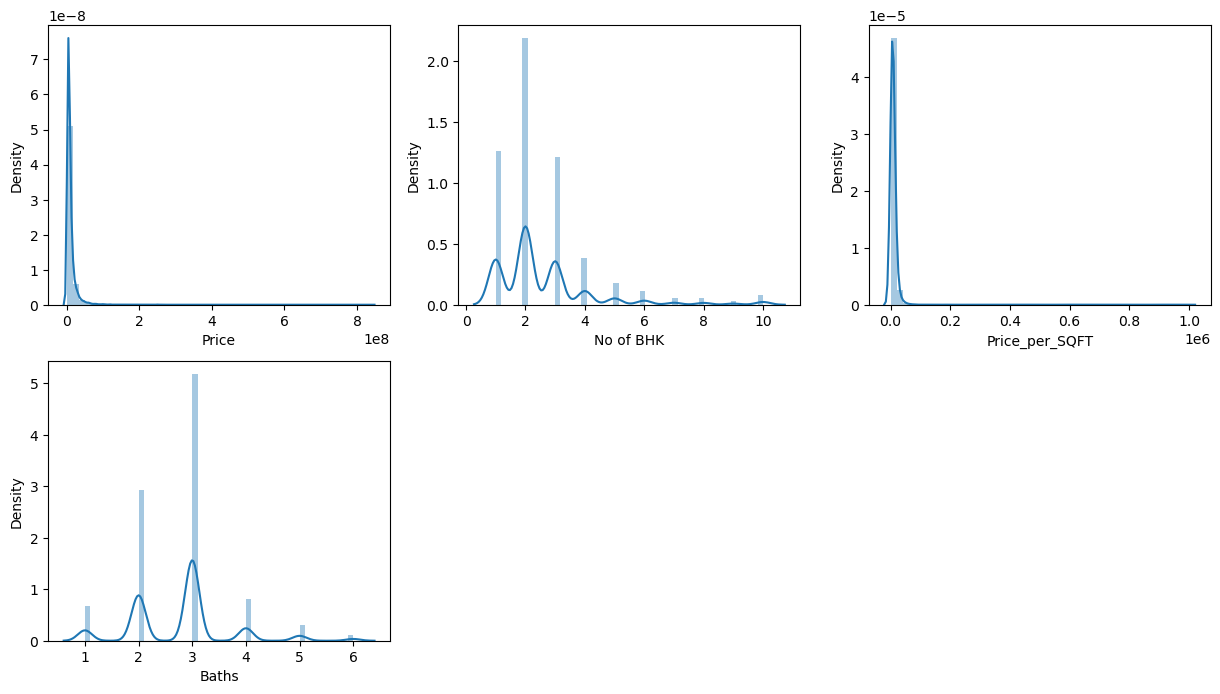

In [45]:
import warnings
warnings.filterwarnings('ignore')
li = ['Price','No of BHK','Price_per_SQFT','Baths']
plt.figure(figsize= (15,8))
for i in range(len(li)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[li[i]],kde = True , hist = True , fit = None)

In [46]:
t = df[['Price','No of BHK','Price_per_SQFT','Baths']]
t.describe()

Price  Price_per_SQFT        Baths
count  1.451700e+04    14517.000000  14517.00000
mean   1.071414e+07    11659.687263      2.75167
std    1.920300e+07    48511.962603      0.89800
min    1.000000e+05        0.000000      1.00000
25%    3.700000e+06     4480.000000      2.00000
50%    6.500000e+06     6050.000000      3.00000
75%    1.140000e+07     9310.000000      3.00000
max    8.400000e+08   999000.000000      6.00000

In [47]:
iqr = t.quantile(0.75) - t.quantile(0.25)

uf = t.quantile(0.75) + 1.5 * iqr

lf = t.quantile(0.75) - 1.5 * iqr
lf , uf
t[(t<lf) | (t>uf)].count()/len(df)*100

Price              8.899910
No of BHK          0.000000
Price_per_SQFT    10.966453
Baths             10.959565
dtype: float64

<Axes: >

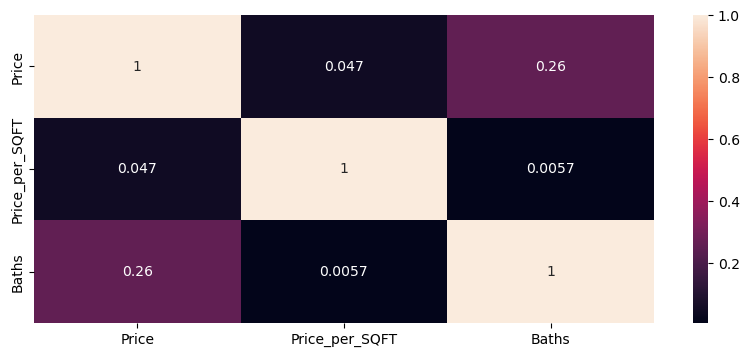

In [48]:
ff = df[['Price','No of BHK','Price_per_SQFT','Baths']]
hh = ff.corr()
plt.figure(figsize = (10,4))
sns.heatmap(hh,annot = True)

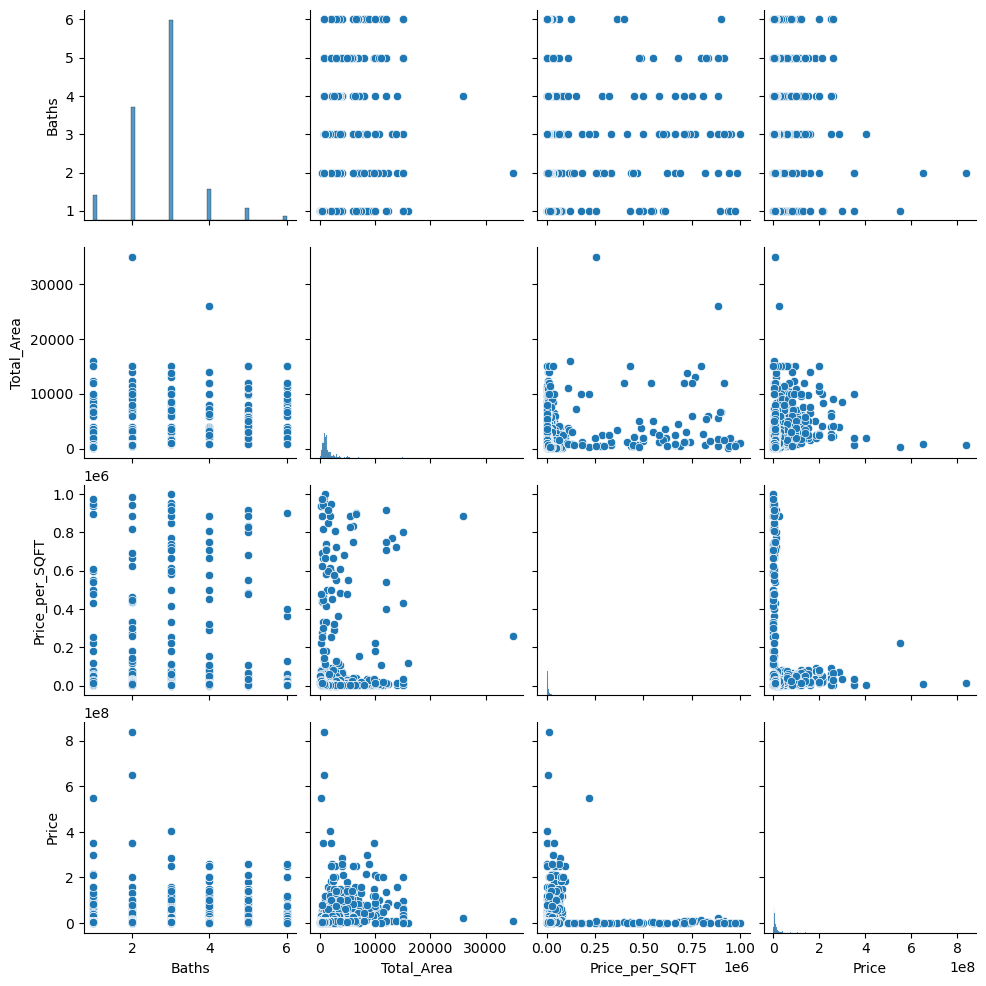

In [49]:
sns.pairplot(df)

In [50]:
#Kmeans clustering

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [52]:
x1 = df.iloc[:,df.columns!='Location']
x2  = x1.iloc[:,x1.columns!='City']
x2  = x2.iloc[:,x2.columns!='Property Title']
x2  = x2.iloc[:,x2.columns!='Description1']
x2  = x2.iloc[:,x2.columns!='Bedrooms1']
x2  = x2.iloc[:,x2.columns!='Name']
x2.head()

Property_Type  Baths Balcony  Total_Area  Price_per_SQFT       Price  \
0          Flat      4     Yes        2583          7700.0  19900000.0   
1          Flat      3      No        1320          7580.0  10000000.0   
2          Flat      3      No        1444          9000.0  13000000.0   
3          Flat      3     Yes        1658         15680.0  26000000.0   
4          Flat      5     Yes        4200          7070.0  29700000.0   

  No of BHK  
0         4  
1         3  
2         3  
3         3  
4         4

In [53]:
for col in ['Property_Type', 'Baths', 'Balcony', 'Total_Area', 'Price_per_SQFT',
       'Price', 'No of BHK']:
    print(col,':',x2[col].unique())

Property_Type : ['Flat' 'Villa' 'Independent House']
Baths : [4 3 5 2 1 6]
Balcony : ['Yes' 'No']
Total_Area : [2583 1320 1444 ...  323  171  472]
Price_per_SQFT : [ 7700.  7580.  9000. ... 17980. 20470. 15990.]
Price : [1.990e+07 1.000e+07 1.300e+07 2.600e+07 2.970e+07 1.080e+07 1.150e+07
 3.000e+07 2.750e+07 2.440e+07 1.250e+07 1.400e+07 1.320e+07 2.900e+07
 1.650e+07 1.500e+07 1.600e+07 1.040e+07 1.100e+07 1.350e+07 4.700e+07
 2.500e+07 1.690e+07 1.200e+07 4.650e+07 2.890e+07 2.200e+07 4.000e+07
 1.270e+07 2.000e+07 1.700e+07 1.220e+07 3.200e+07 1.450e+07 1.750e+07
 1.900e+07 1.050e+07 1.670e+07 1.950e+07 3.990e+07 2.400e+07 4.150e+07
 3.800e+07 1.200e+08 4.250e+07 8.400e+07 1.170e+07 1.910e+07 5.100e+07
 1.550e+07 1.180e+07 2.100e+07 1.210e+07 1.970e+07 2.010e+07 1.800e+07
 1.090e+07 3.750e+07 7.200e+07 2.110e+07 3.950e+07 3.720e+07 1.720e+07
 3.850e+07 1.980e+07 1.030e+07 2.850e+07 2.870e+07 1.850e+07 1.370e+07
 1.190e+07 1.810e+07 3.250e+07 3.500e+07 1.020e+07 3.600e+07 1.430e+07

In [54]:
encoding = {"Property_Type":{"Flat": 0, "Villa": 1 , "Independent House" : 2},
            "Balcony":{"Yes": 1, "No": 0}}

In [55]:
obj_df = x2.replace(encoding)
obj_df.head()

Property_Type  Baths  Balcony  Total_Area  Price_per_SQFT       Price  \
0              0      4        1        2583          7700.0  19900000.0   
1              0      3        0        1320          7580.0  10000000.0   
2              0      3        0        1444          9000.0  13000000.0   
3              0      3        1        1658         15680.0  26000000.0   
4              0      5        1        4200          7070.0  29700000.0   

  No of BHK  
0         4  
1         3  
2         3  
3         3  
4         4

In [56]:
numericalColumns = obj_df.select_dtypes(include=['int64', 'float64']).columns
numericalData = obj_df[numericalColumns]

In [57]:
scaler = StandardScaler()
numericalScaledData = scaler.fit_transform(numericalData)
    
scaledData = pd.DataFrame(numericalScaledData, columns=numericalColumns)

In [58]:
pca = PCA(random_state = 42)
pca.fit(scaledData)

PCA(random_state=42)

In [59]:
dataPCA = pca.transform(scaledData)

In [60]:
dfPCA = pd.DataFrame(dataPCA, columns = [f'PC{x +1}' for x in range(len(scaledData.columns))])

In [61]:
dfPCA.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  1.491809 -0.706678 -0.414032  1.087858 -0.566694 -0.017015
1 -0.523894 -0.057530  1.006467  0.699689 -0.462423  0.077745
2 -0.395647 -0.040197  1.062151  0.768911 -0.364612  0.109298
3  0.684650 -0.331385 -0.555724  0.917968  0.464960 -0.141659
4  2.994303 -0.993001  0.025906  1.627731 -1.083752  0.297432

In [62]:
PCAsummary = pd.DataFrame({'Standard Deviation':dfPCA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
PCAsummary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1            1.464853                0.357608              0.357608
PC2            1.005643                0.168541              0.526149
PC3            0.928547                0.143690              0.669839
PC4            0.912881                0.138882              0.808721
PC5            0.863593                0.124290              0.933012
PC6            0.634002                0.066988              1.000000

In [63]:
factorLoadings = pd.DataFrame(pca.components_, columns = scaledData.columns, index = dfPCA.columns).T
factorLoadings.style.background_gradient(cmap = 'Blues')

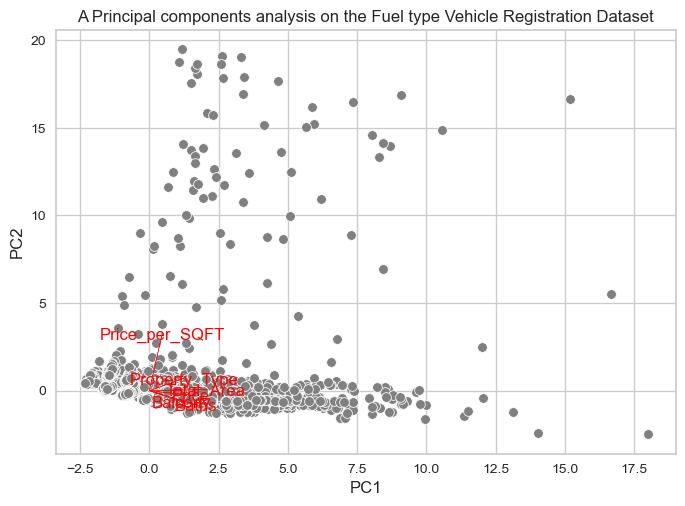

In [64]:
indexNames = factorLoadings.index

sns.scatterplot(dfPCA, x = 'PC1', y = 'PC2', color = 'grey')

for i in range(len(factorLoadings['PC1'])):
    plt.arrow(0, 0, factorLoadings['PC1'][i] * 3.5, factorLoadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factorLoadings['PC1'][i] * 3.5), factorLoadings['PC2'][i]* 3.5, indexNames[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis on the Fuel type Vehicle Registration Dataset')
plt.grid(True)
plt.show()

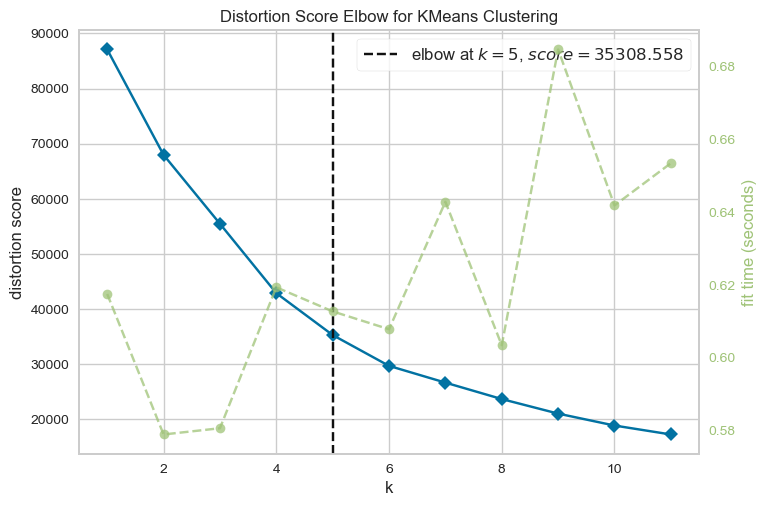

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(scaledData)

visualizer.show()

In [66]:
kmeans = KMeans(n_clusters=5)  
obj_df['Cluster'] = kmeans.fit_predict(scaledData)

print(obj_df['Cluster'].value_counts())

1    5237
3    4620
2    2861
0    1736
4      63
Name: Cluster, dtype: int64


In [67]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(obj_df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [68]:
y = kmeans.predict(obj_df)
y_df = pd.DataFrame(y,columns=['Class'])

In [69]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

Name      Property_Type Bedrooms1  Baths  \
0                   Casagrand ECR 14               Flat     4 BHK      4   
1                        DAC Prapthi               Flat     3 BHK      3   
2                     DRA 90 Degrees               Flat     3 BHK      3   
3                   Ramcons Dominion               Flat     3 BHK      3   
4                         VGN Coasta               Flat     4 BHK      5   
...                              ...                ...       ...    ...   
14512       Property in  Tilak Nagar               Flat     2 BHK      3   
14513   Property in  Jaffarpur Kalan  Independent House      1 RK      2   
14514      Property in  Geeta Colony               Flat      1 RK      1   
14515  Property in  Sector 16 Rohini               Flat     3 BHK      2   
14516   Property in  Sector 3 Rohini  Independent House      1 RK      1   

      Balcony       City                                           Location  \
0         Yes    Chennai                      Kanathur Reddikuppam, Chennai   
1          No    Chennai           Kasthuribai Nagar, West Tambaram,Chennai   
2          No    Chennai                  Rose Avenue, Pallikaranai,Chennai   
3         Yes    Chennai             Tirumurthy Nagar, Nungambakkam,Chennai   
4         Yes    Chennai                                 Muttukadu, Chennai   
...       ...        ...                                                ...   
14512     Yes  New Delhi      Krishna Park Extension, Tilak Nagar,New Delhi   
14513     Yes  New Delhi                   Rawta, Jaffarpur Kalan,New Delhi   
14514     Yes  New Delhi                Rani Garden, Geeta Colony,New Delhi   
14515     Yes  New Delhi  Lig flat rohini,Sector 16E, Sector 16 Rohini,N...   
14516     Yes  New Delhi               Sector 3B, Sector 3 Rohini,New Delhi   

       Total_Area  Price_per_SQFT       Price  \
0            2583          7700.0  19900000.0   
1            1320          7580.0  10000000.0   
2            1444          9000.0  13000000.0   
3            1658         15680.0  26000000.0   
4            4200          7070.0  29700000.0   
...           ...             ...         ...   
14512        1053          3800.0   4000000.0   
14513         472          2970.0   1400000.0   
14514         378          7940.0   3000000.0   
14515         700          8570.0   6000000.0   
14516         344         15990.0   5500000.0   

                                          Property Title  \
0      4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1          3 BHK Flat for sale in West Tambaram, Chennai   
2           3 BHK Flat for sale in Pallikaranai, Chennai   
3           3 BHK Flat for sale in Nungambakkam, Chennai   
4              4 BHK Flat for sale in Muttukadu, Chennai   
...                                                  ...   
14512      2 BHK Flat for sale in Tilak Nagar, New Delhi   
14513  1 BHK Independent House for sale in Jaffarpur ...   
14514     1 BHK Flat for sale in Geeta Colony, New Delhi   
14515  3 BHK Flat for sale in Sector 16 Rohini, New D...   
14516  1 RK Independent House for sale in Sector 3 Ro...   

                                            Description1 No of BHK  Class  
0      Best 4 BHK Apartment for modern-day lifestyle ...         4      2  
1      Property for sale in Tambaram, Chennai. This 3...         3      0  
2      Looking for a 3 BHK Apartment for sale in Chen...         3      0  
3      Best 3 BHK Apartment for modern-day lifestyle ...         3      2  
4      Best 4 BHK Apartment for modern-day lifestyle ...         4      2  
...                                                  ...       ...    ...  
14512  Looking for a good 2 BHK Apartment in Tilak Na...         2      0  
14513  1 BHK Independent House for sale in Jaffarpur ...         1      0  
14514  Property for sale in Geeta Colony, Delhi. This...         1      0  
14515  Check out this 3 BHK Apartment for sale in Roh...         3      0  
14516  This is an indepe

In [70]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(obj_df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [71]:
y1 = kmeans1.predict(obj_df)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [72]:
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

Name      Property_Type Bedrooms1  Baths  \
0                   Casagrand ECR 14               Flat     4 BHK      4   
1                        DAC Prapthi               Flat     3 BHK      3   
2                     DRA 90 Degrees               Flat     3 BHK      3   
3                   Ramcons Dominion               Flat     3 BHK      3   
4                         VGN Coasta               Flat     4 BHK      5   
...                              ...                ...       ...    ...   
14512       Property in  Tilak Nagar               Flat     2 BHK      3   
14513   Property in  Jaffarpur Kalan  Independent House      1 RK      2   
14514      Property in  Geeta Colony               Flat      1 RK      1   
14515  Property in  Sector 16 Rohini               Flat     3 BHK      2   
14516   Property in  Sector 3 Rohini  Independent House      1 RK      1   

      Balcony       City                                           Location  \
0         Yes    Chennai                      Kanathur Reddikuppam, Chennai   
1          No    Chennai           Kasthuribai Nagar, West Tambaram,Chennai   
2          No    Chennai                  Rose Avenue, Pallikaranai,Chennai   
3         Yes    Chennai             Tirumurthy Nagar, Nungambakkam,Chennai   
4         Yes    Chennai                                 Muttukadu, Chennai   
...       ...        ...                                                ...   
14512     Yes  New Delhi      Krishna Park Extension, Tilak Nagar,New Delhi   
14513     Yes  New Delhi                   Rawta, Jaffarpur Kalan,New Delhi   
14514     Yes  New Delhi                Rani Garden, Geeta Colony,New Delhi   
14515     Yes  New Delhi  Lig flat rohini,Sector 16E, Sector 16 Rohini,N...   
14516     Yes  New Delhi               Sector 3B, Sector 3 Rohini,New Delhi   

       Total_Area  Price_per_SQFT       Price  \
0            2583          7700.0  19900000.0   
1            1320          7580.0  10000000.0   
2            1444          9000.0  13000000.0   
3            1658         15680.0  26000000.0   
4            4200          7070.0  29700000.0   
...           ...             ...         ...   
14512        1053          3800.0   4000000.0   
14513         472          2970.0   1400000.0   
14514         378          7940.0   3000000.0   
14515         700          8570.0   6000000.0   
14516         344         15990.0   5500000.0   

                                          Property Title  \
0      4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1          3 BHK Flat for sale in West Tambaram, Chennai   
2           3 BHK Flat for sale in Pallikaranai, Chennai   
3           3 BHK Flat for sale in Nungambakkam, Chennai   
4              4 BHK Flat for sale in Muttukadu, Chennai   
...                                                  ...   
14512      2 BHK Flat for sale in Tilak Nagar, New Delhi   
14513  1 BHK Independent House for sale in Jaffarpur ...   
14514     1 BHK Flat for sale in Geeta Colony, New Delhi   
14515  3 BHK Flat for sale in Sector 16 Rohini, New D...   
14516  1 RK Independent House for sale in Sector 3 Ro...   

                                            Description1 No of BHK  Class  
0      Best 4 BHK Apartment for modern-day lifestyle ...         4      2  
1      Property for sale in Tambaram, Chennai. This 3...         3      0  
2      Looking for a 3 BHK Apartment for sale in Chen...         3      0  
3      Best 3 BHK Apartment for modern-day lifestyle ...         3      2  
4      Best 4 BHK Apartment for modern-day lifestyle ...         4      2  
...                                                  ...       ...    ...  
14512  Looking for a good 2 BHK Apartment in Tilak Na...         2      0  
14513  1 BHK Independent House for sale in Jaffarpur ...         1      0  
14514  Property for sale in Geeta Colony, Delhi. This...         1      0  
14515  Check out this 3 BHK Apartment for sale in Roh...         3      0  
14516  This is an indepe

In [73]:
final_data1.columns

Index(['Name', 'Property_Type', 'Bedrooms1', 'Baths', 'Balcony', 'City',
       'Location', 'Total_Area', 'Price_per_SQFT', 'Price', 'Property Title',
       'Description1', 'No of BHK', 'Class'],
      dtype='object')

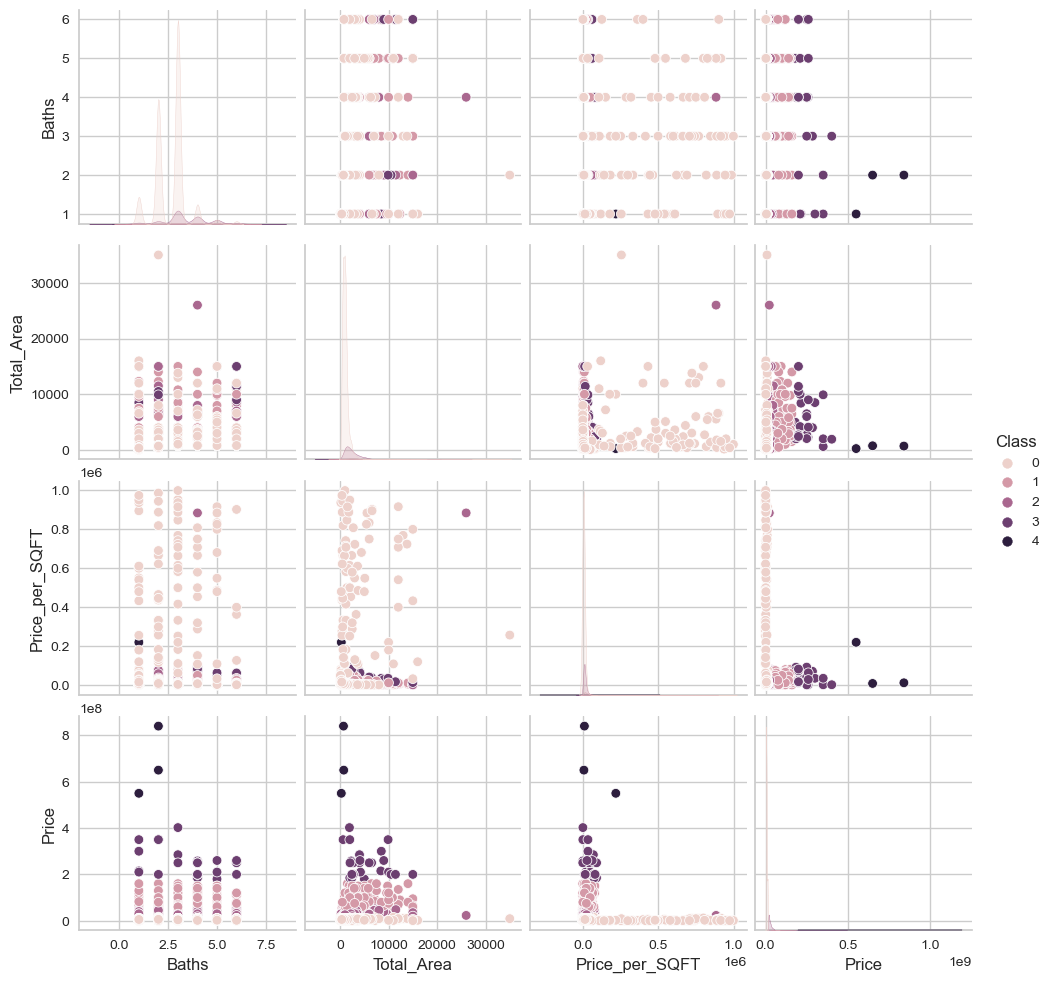

In [74]:
sns.pairplot(final_data1, hue='Class')

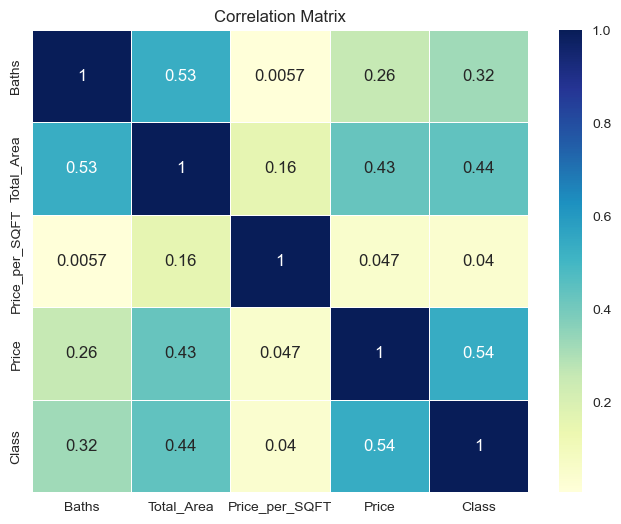

In [75]:
correlation_matrix = final_data1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=5)  
final_data1['Cluster'] = kmeans.fit_predict(scaledData)

print(final_data1['Cluster'].value_counts())

1    5233
2    4620
0    2861
4    1739
3      64
Name: Cluster, dtype: int64


In [77]:
finalColumns = ['Name', 'Property_Type', 'Bedrooms1', 'Baths', 'Balcony', 'City',
       'Total_Area', 'Price_per_SQFT', 'No of BHK', 'Class']

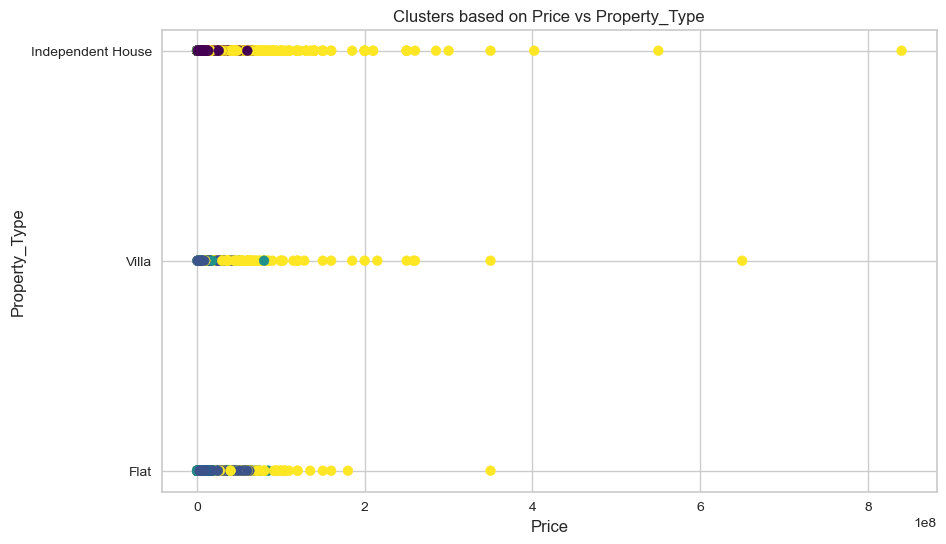

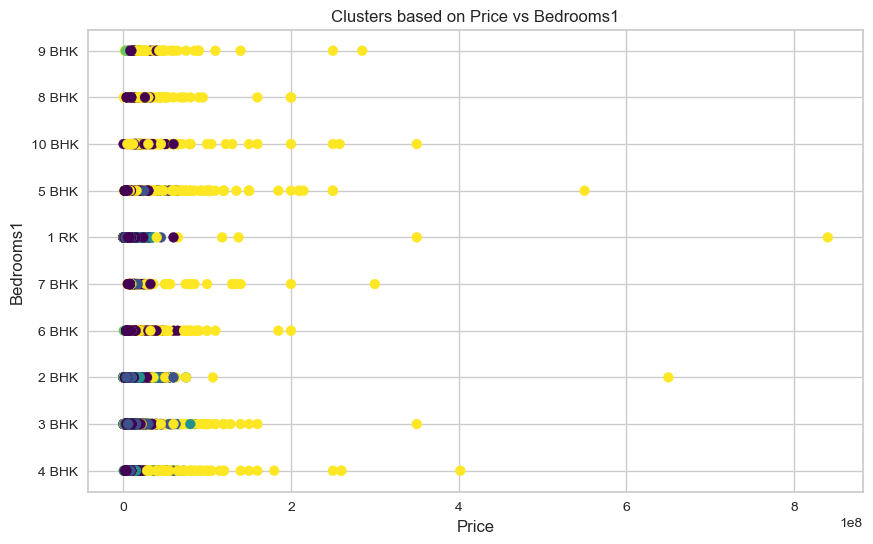

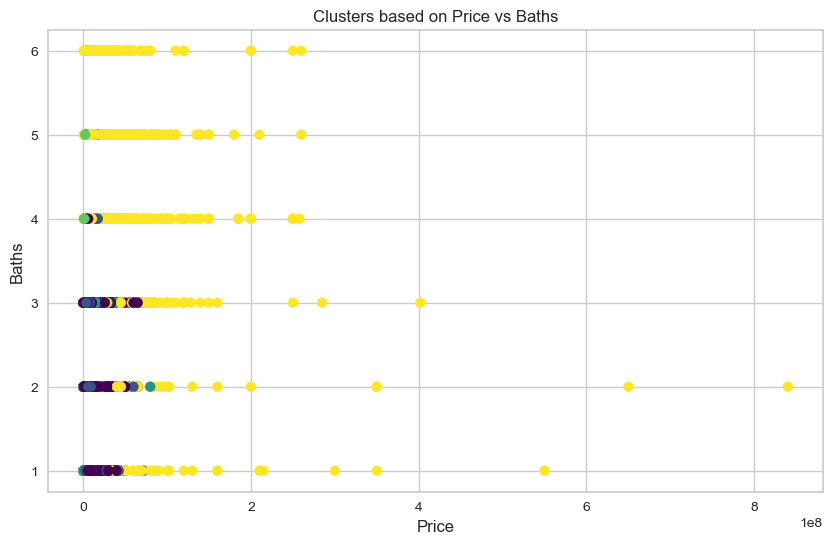

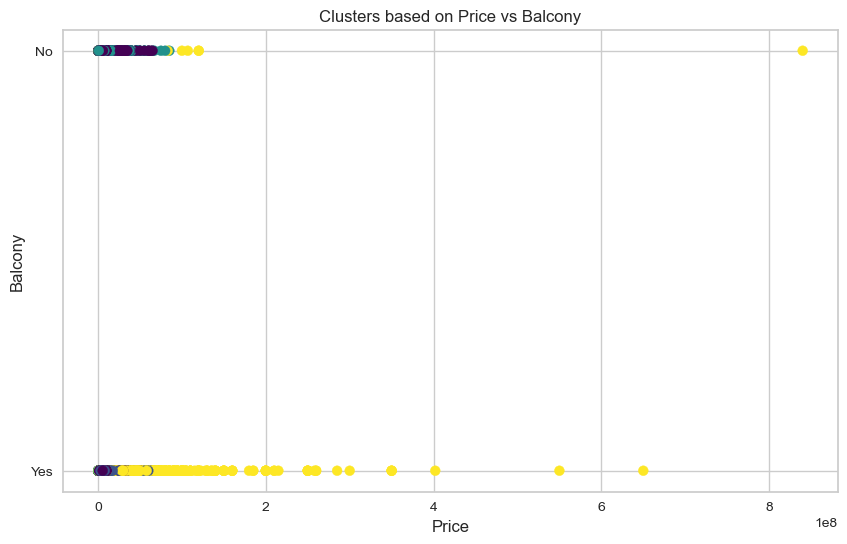

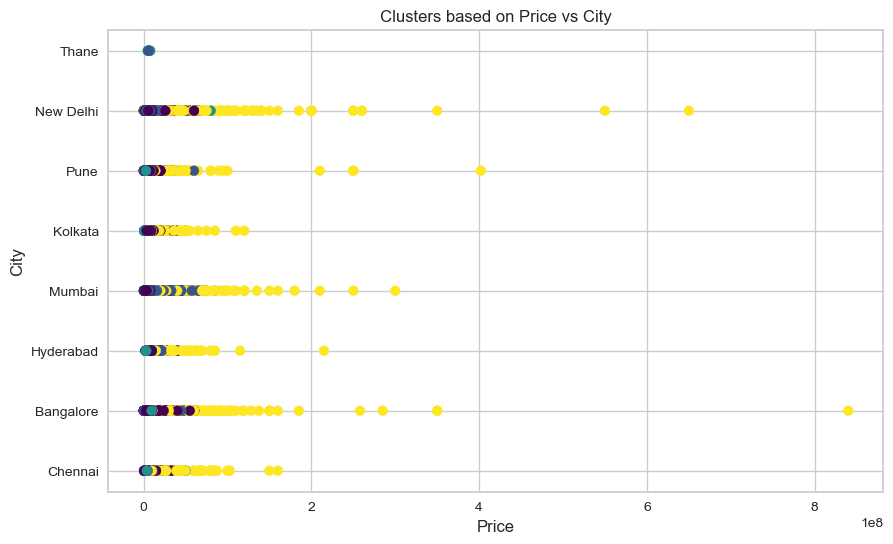

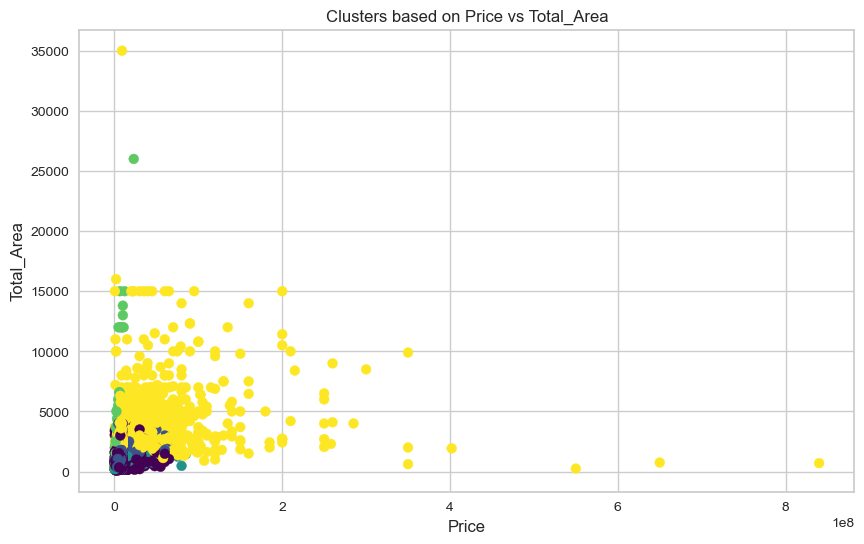

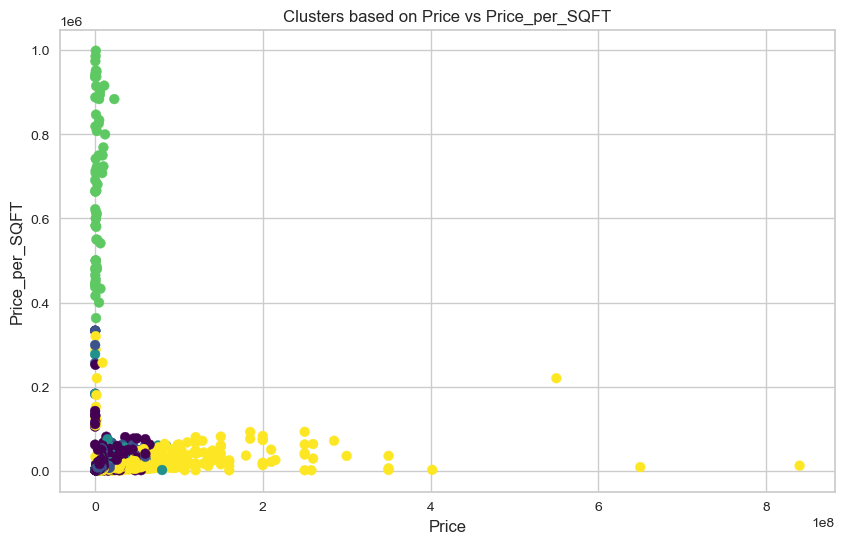

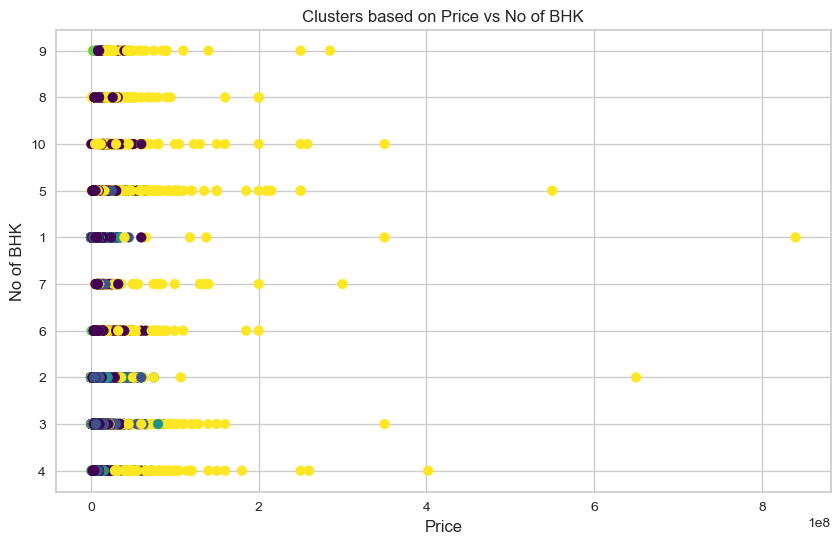

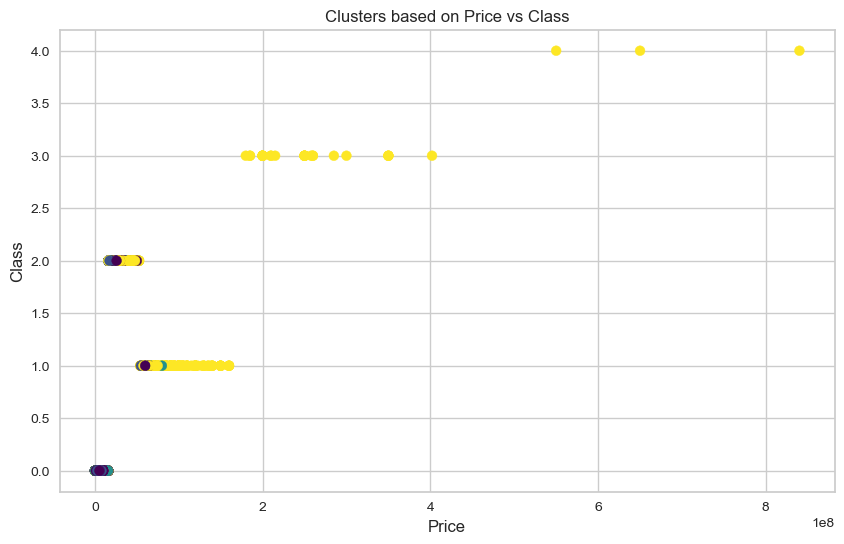

In [78]:
for feature in finalColumns[1:]: 
    plt.figure(figsize=(10, 6))
    plt.scatter(x='Price', y=feature, data=final_data1, c=final_data1['Cluster'], cmap='viridis', s=50)
    plt.xlabel('Price')
    plt.ylabel(feature)
    plt.title(f'Clusters based on Price vs {feature}')
    plt.show()

In [79]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(scaledData)
final_data1['Cluster Number'] = kmeans.labels_ 
print (kmeans.labels_) 
 
print (kmeans.inertia_) 

print(kmeans.n_iter_) 

print(kmeans.cluster_centers_)  

[1 0 0 ... 2 2 4]
35308.597203251185
3
[[-6.50557840e-01 -2.33985688e-01 -1.20112685e+00 -3.35722208e-01
  -8.13672796e-02 -2.20640411e-01]
 [ 1.07485967e+00  1.62875711e+00  8.15029894e-01  1.74765660e+00
  -1.32008384e-02  1.17136878e+00]
 [-6.38029747e-01 -1.53834115e-01  8.32551534e-01 -2.07030646e-01
  -7.69247992e-02 -1.41387928e-01]
 [ 1.06261621e+00  2.41192501e-01  3.48342396e-01  2.19436177e+00
   1.42278562e+01 -4.08722462e-01]
 [ 1.53983689e+00 -3.37290212e-01 -8.65488319e-02 -1.91084936e-01
  -3.31998955e-02 -8.89560232e-02]]


In [80]:
final_data1.head()

Name Property_Type Bedrooms1  Baths Balcony     City  \
0  Casagrand ECR 14          Flat     4 BHK      4     Yes  Chennai   
1       DAC Prapthi          Flat     3 BHK      3      No  Chennai   
2    DRA 90 Degrees          Flat     3 BHK      3      No  Chennai   
3  Ramcons Dominion          Flat     3 BHK      3     Yes  Chennai   
4        VGN Coasta          Flat     4 BHK      5     Yes  Chennai   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
2         Rose Avenue, Pallikaranai,Chennai        1444          9000.0   
3    Tirumurthy Nagar, Nungambakkam,Chennai        1658         15680.0   
4                        Muttukadu, Chennai        4200          7070.0   

        Price                                     Property Title  \
0  19900000.0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10000000.0      3 BHK Flat for sale in West Tambaram, Chennai   
2  13000000.0       3 BHK Flat for sale in Pallikaranai, Chennai   
3  26000000.0       3 BHK Flat for sale in Nungambakkam, Chennai   
4  29700000.0          4 BHK Flat for sale in Muttukadu, Chennai   

                                        Description1 No of BHK  Class  \
0  Best 4 BHK Apartment for modern-day lifestyle ...         4      2   
1  Property for sale in Tambaram, Chennai. This 3...         3      0   
2  Looking for a 3 BHK Apartment for sale in Chen...         3      0   
3  Best 3 BHK Apartment for modern-day lifestyle ...         3      2   
4  Best 4 BHK Apartment for modern-day lifestyle ...         4      2   

   Cluster  Cluster Number  
0        4               1  
1        2               0  
2        2               0  
3        1               2  
4        4               1

In [81]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 1739, 0: 4620, 2: 5234, 4: 2861, 3: 63})

In [82]:
kmeans.cluster_centers_[:,1]

array([-0.23398569,  1.62875711, -0.15383412,  0.2411925 , -0.33729021])

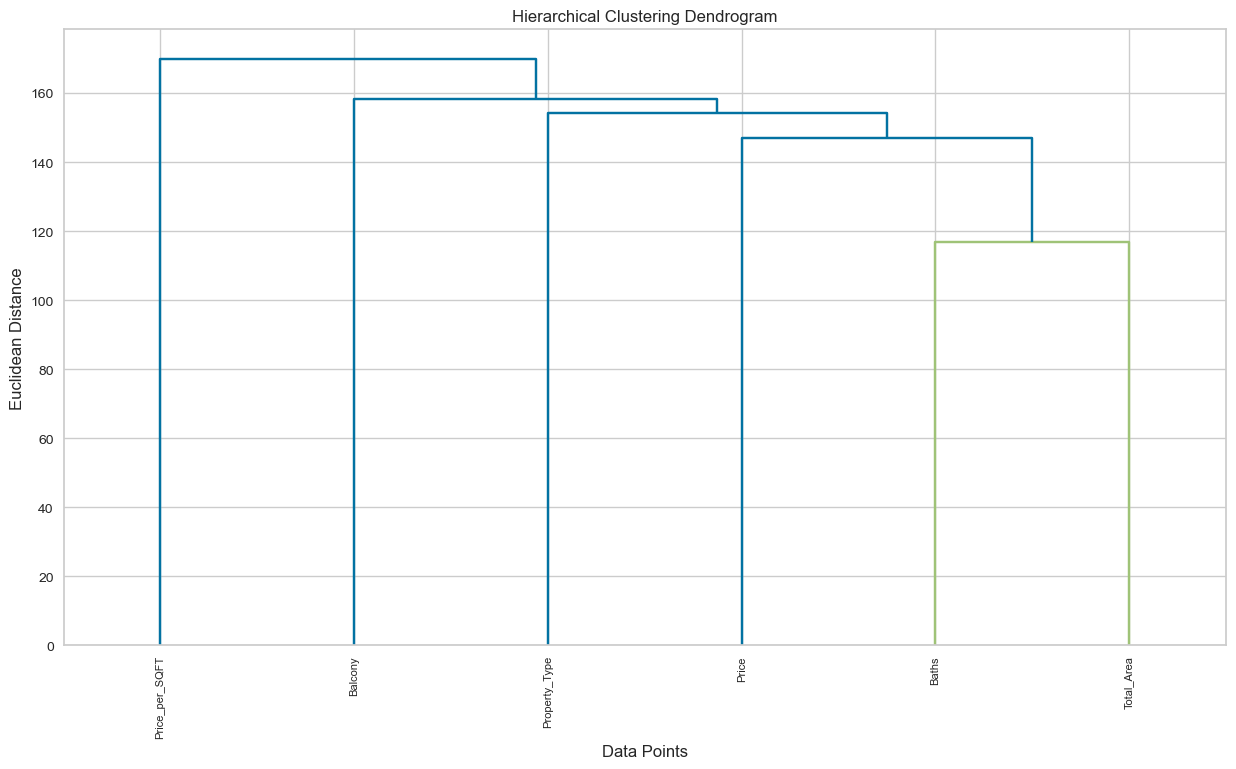

In [83]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = scaledData.transpose()

MD_vclust = linkage(transposed_data, method='complete')

plt.figure(figsize=(15, 8))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

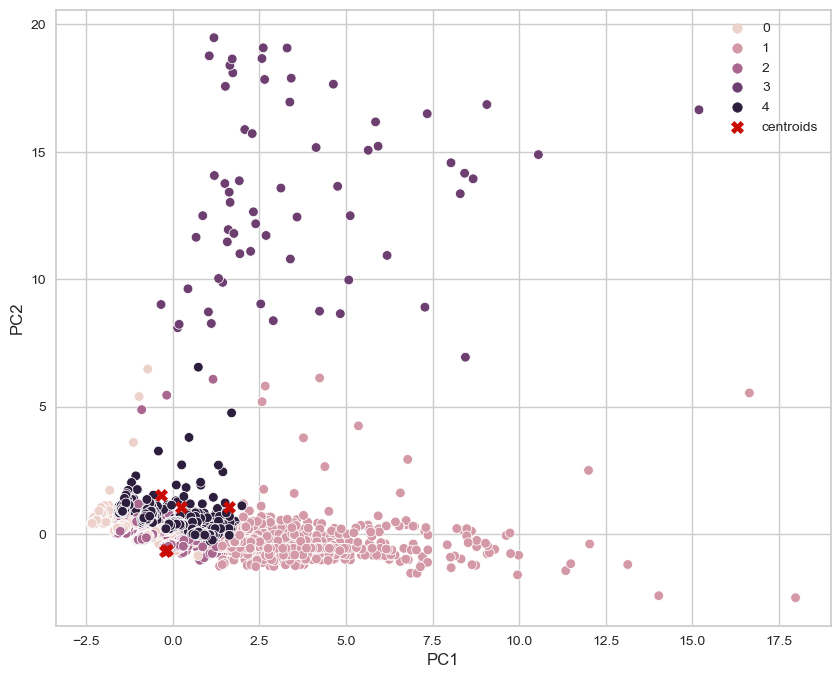

In [84]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfPCA, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [85]:
#segmentation

In [86]:
from sklearn.preprocessing import LabelEncoder
final_data1['City']= LabelEncoder().fit_transform(final_data1['City'])
city= final_data1.groupby('Cluster Number')['City'].mean()
city= city.to_frame().reset_index()
city

Cluster Number      City
0               0  3.177056
1               1  1.761932
2               2  2.984524
3               3  2.904762
4               4  2.565886

In [87]:
from sklearn.preprocessing import LabelEncoder
final_data1['Price']= LabelEncoder().fit_transform(final_data1['Price'])
price= final_data1.groupby('Cluster Number')['Price'].mean()
price= price.to_frame().reset_index()
price

Cluster Number       Price
0               0  360.197835
1               1  668.906843
2               2  397.289071
3               3  155.206349
4               4  429.511360

In [88]:
from sklearn.preprocessing import LabelEncoder
final_data1['No of BHK']= LabelEncoder().fit_transform(final_data1['No of BHK'])
bhk= final_data1.groupby('Cluster Number')['No of BHK'].mean()
bhk= bhk.to_frame().reset_index()
bhk

Cluster Number  No of BHK
0               0   1.609740
1               1   4.136285
2               2   1.834734
3               3   2.079365
4               4   2.697309

In [89]:
from sklearn.preprocessing import LabelEncoder
final_data1['Price_per_SQFT']= LabelEncoder().fit_transform(final_data1['Price_per_SQFT'])
p= final_data1.groupby('Cluster Number')['Price_per_SQFT'].mean()
p= p.to_frame().reset_index()
p

Cluster Number  Price_per_SQFT
0               0      567.732684
1               1      683.078206
2               2      587.885365
3               3     2066.428571
4               4      718.947571

In [90]:
segment = price.merge(bhk, on = 'Cluster Number', how = 'left')
segment

Cluster Number       Price  No of BHK
0               0  360.197835   1.609740
1               1  668.906843   4.136285
2               2  397.289071   1.834734
3               3  155.206349   2.079365
4               4  429.511360   2.697309

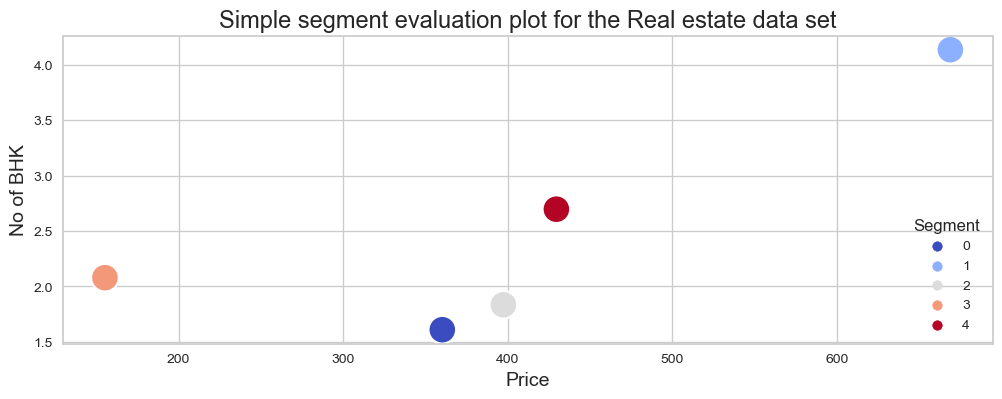

In [91]:
plt.figure(figsize = (12,4))
sns.scatterplot(x = "Price", y = "No of BHK",data=segment,s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Simple segment evaluation plot for the Real estate data set",
          fontsize = 17) 
plt.xlabel("Price", fontsize = 14) 
plt.ylabel("No of BHK", fontsize = 14) 
plt.legend(title='Segment', loc='lower right')
plt.show()

In [92]:
#Decision Tree

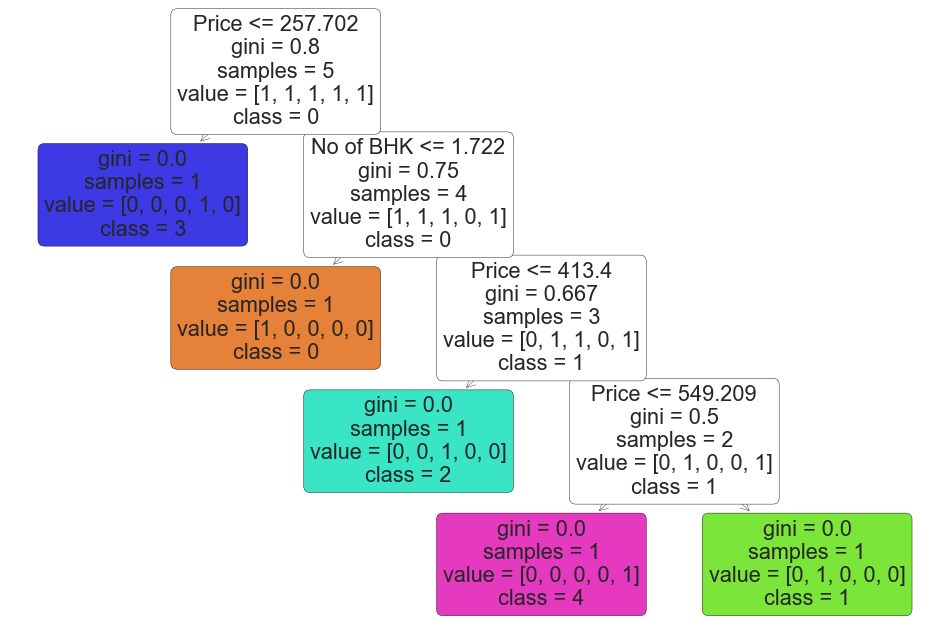

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer


features = ['Price', 'No of BHK']
target = 'Cluster Number'

X = segment[features]
y = segment[target]

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.show()